In [75]:
# new configuration

import numpy as np
import matplotlib.pyplot as plt
import random as rand
import math

#Declaring receivers
c=10
receiver=np.zeros((5,2))

for i in range(0,5):
    receiver[i]=(rand.randint(0,100), rand.randint(0,100))
    
source=np.array([rand.randint(0,100), rand.randint(0,100)])                  
source

array([23, 59])

In [76]:
#Generating time data

time=np.zeros(5)
for i in range(0,5):
    time[i]= ( math.sqrt( (receiver[i][0]-source[0])**2 + (receiver[i][1]-source[1])**2 ) ) /c

In [77]:
#Finding error at each point of grid

err=np.zeros((100,100))
for i in range(0,100,1):
    for j in range(0,100,1):
        for k in range(0,5,1):
            err[i][j] += abs( ( math.sqrt( (i-receiver[k][0])**2 + (j-receiver[k][1])**2 ) ) / c - time[k] ) 

err_prime=np.zeros((100,100))
for i in range(0,100,1):
    for j in range(0,100,1):
        err_prime[i][j]=err[j][i]
    


min_err=np.amin(err)

print(min_err)

print(np.where(err==np.amin(err)))

0.0
(array([23], dtype=int64), array([59], dtype=int64))


In [78]:
receiver

array([[56., 47.],
       [ 1., 71.],
       [49., 84.],
       [74., 51.],
       [42., 49.]])

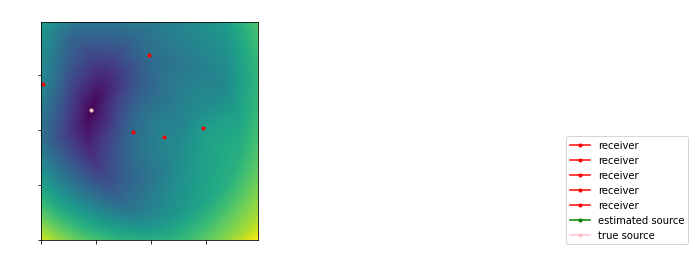

In [79]:
#plotting

x=np.zeros(100)
y=np.zeros(100)

for alpha in range(0,100,1):
    x[alpha]=alpha

for beta in range(0,100,1):
    y[beta]=beta

    
fig=plt.figure()
ax = fig.add_subplot(111)



plt.contourf(x,y,err_prime, 420)

ax.set_aspect('equal', adjustable='box')

plt.xlabel('x coordinate', color='white')
plt.ylabel('y coordinate', color='white')
plt.title('gradient plot showing error everywhere', color='white')

plt.xticks([0,25,50,75,100], color='white')
plt.yticks([0,25,50,75,100], color='white')


for i in range(0, 5):
    plt.plot(receiver[i][0], receiver[i][1], marker='.', label='receiver', color='red')
plt.plot(np.where(err==np.amin(err))[0], np.where(err==np.amin(err))[1], marker='.', label='estimated source', color='green')   

plt.plot(source[0], source[1], marker='.', label='true source', color='pink')


plt.legend(bbox_to_anchor = (3,0.5))
plt.show()

#as you can see, estimated source and true source overlap